# Alphaa AI Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("banknifty-data (1).csv")

In [3]:
df.head()

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  3448 non-null   object 
 1   open      3448 non-null   float64
 2   high      3448 non-null   float64
 3   low       3448 non-null   float64
 4   close     3448 non-null   float64
 5   volume    3448 non-null   float64
dtypes: float64(5), object(1)
memory usage: 161.8+ KB


In [5]:
df.shape

(3448, 6)

In [6]:
df_copy=df.copy()

In [7]:
new_df=pd.DataFrame(df.datetime.str[:7])
new_df['mon_perc_ret']=(df.close-df.open)/df.open
new_df

,datetime,mon_perc_ret
0,2006-01,-0.002343
1,2006-01,0.015183
2,2006-01,0.016147
3,2006-01,0.009811
4,2006-01,-0.002444
...,...,...
3443,2019-12,-0.001486
3444,2019-12,-0.001245
3445,2019-12,0.003660
3446,2019-12,-0.001283


In [8]:
grouped_df=pd.DataFrame(new_df.groupby("datetime")["mon_perc_ret"].mean()).reset_index()
grouped_df.head()

,datetime,mon_perc_ret
0,2006-01,0.000162
1,2006-02,-0.000093
2,2006-03,-0.000525
3,2006-04,-0.001505
4,2006-05,-0.005277


In [9]:
grouped_df

,datetime,mon_perc_ret
0,2006-01,0.000162
1,2006-02,-0.000093
2,2006-03,-0.000525
3,2006-04,-0.001505
4,2006-05,-0.005277
...,...,...
163,2019-08,-0.002885
164,2019-09,0.002340
165,2019-10,-0.002030
166,2019-11,0.001512


In [10]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      168 non-null    object 
 1   mon_perc_ret  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [11]:
grouped_df["Year"]=grouped_df.datetime.str[:4]
grouped_df["Month"]=grouped_df.datetime.str[5:7]
grouped_df.head()

,datetime,mon_perc_ret,Year,Month
0,2006-01,0.000162,2006,01
1,2006-02,-0.000093,2006,02
2,2006-03,-0.000525,2006,03
3,2006-04,-0.001505,2006,04
4,2006-05,-0.005277,2006,05


In [12]:
grouped_df['Month_name']=grouped_df.Month.map({'01':'Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'})
grouped_df.head()

,datetime,mon_perc_ret,Year,Month,Month_name
0,2006-01,0.000162,2006,01,Jan
1,2006-02,-0.000093,2006,02,Feb
2,2006-03,-0.000525,2006,03,Mar
3,2006-04,-0.001505,2006,04,Apr
4,2006-05,-0.005277,2006,05,May


Text(159.0, 0.5, 'Year')

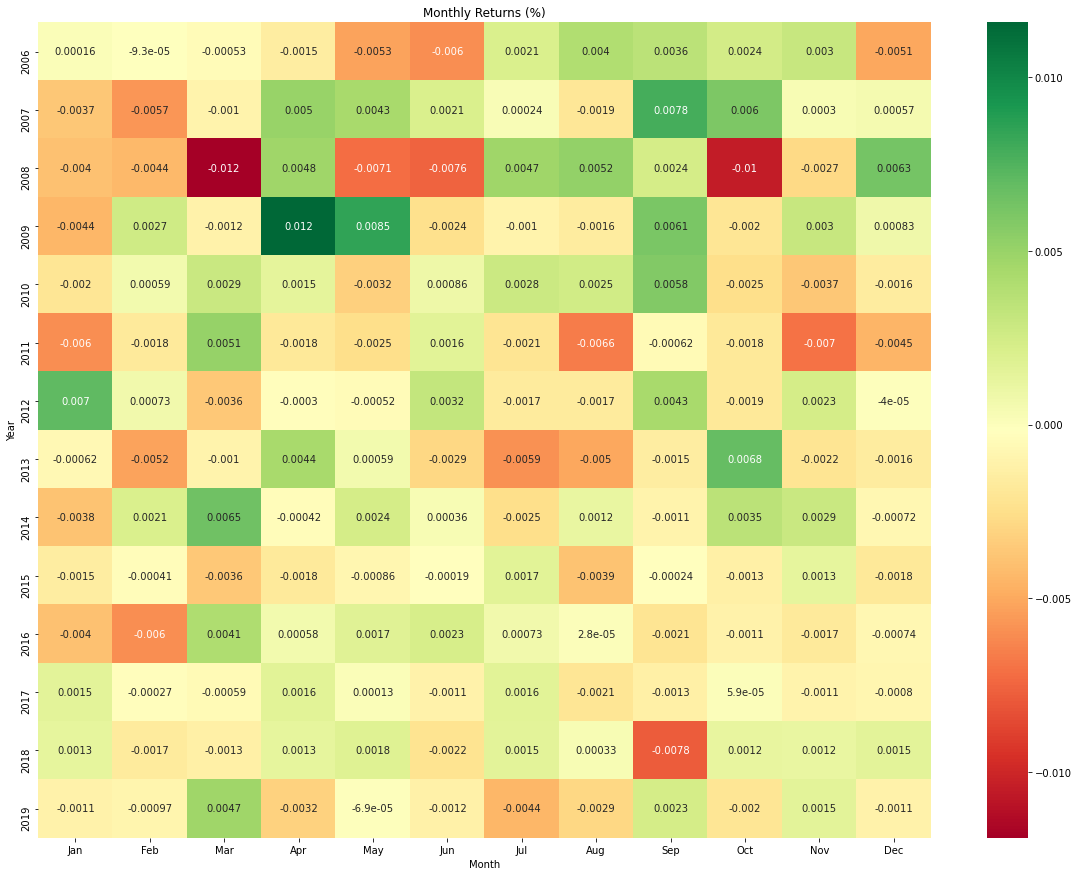

In [13]:
plt.figure(figsize=(20,15))
plt.title("Monthly Returns (%)")
sns.heatmap((np.asarray(grouped_df['mon_perc_ret'])).reshape(14,12),xticklabels=grouped_df.Month_name.unique(),yticklabels=grouped_df.Year.unique(),annot=True,cmap='RdYlGn')
plt.xlabel("Month")
plt.ylabel("Year")

In [14]:
grouped_df['datetime']=pd.to_datetime(grouped_df['datetime'])
grouped_df.head()

,datetime,mon_perc_ret,Year,Month,Month_name
0,2006-01-01,0.000162,2006,01,Jan
1,2006-02-01,-0.000093,2006,02,Feb
2,2006-03-01,-0.000525,2006,03,Mar
3,2006-04-01,-0.001505,2006,04,Apr
4,2006-05-01,-0.005277,2006,05,May


In [15]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      168 non-null    datetime64[ns]
 1   mon_perc_ret  168 non-null    float64       
 2   Year          168 non-null    object        
 3   Month         168 non-null    object        
 4   Month_name    168 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.7+ KB


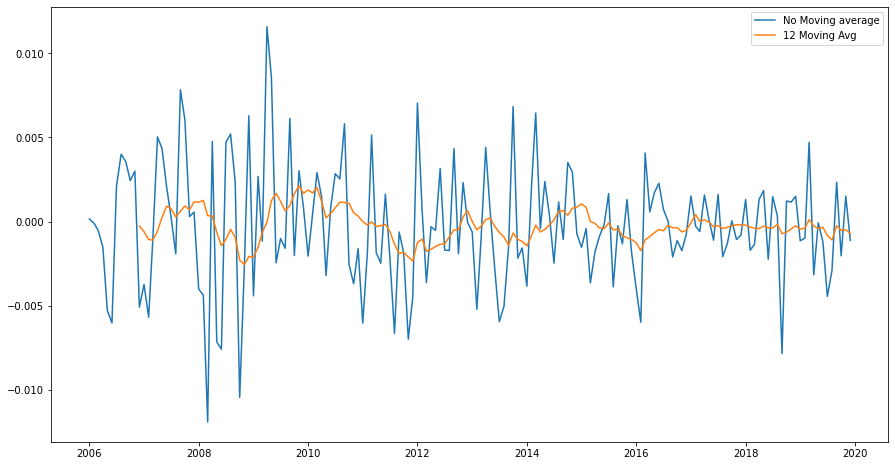

In [16]:
plt.figure(figsize=(15,8))
plt.plot(grouped_df['datetime'],grouped_df['mon_perc_ret'],label='No Moving average')
plt.plot(grouped_df['datetime'],grouped_df['mon_perc_ret'].rolling(12).mean(),label='12 Moving Avg')
plt.legend()

#### From the above time series data we can see that there is a continuous fluctuations in the trend of monthly percentage returns.

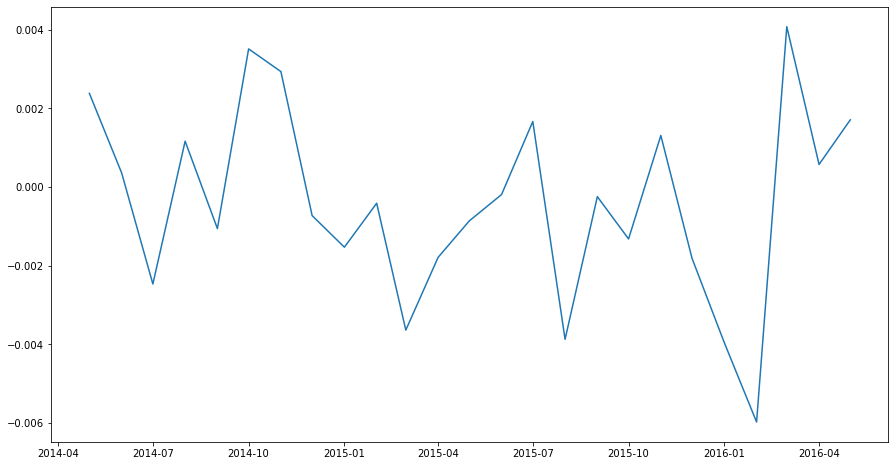

In [17]:
plt.figure(figsize=(15,8))
plt.plot(grouped_df['datetime'].iloc[100:125],grouped_df['mon_perc_ret'].iloc[100:125],label='No Moving average')

In [18]:
df.head()

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0


In [19]:
date_ind_df=df.set_index('datetime')

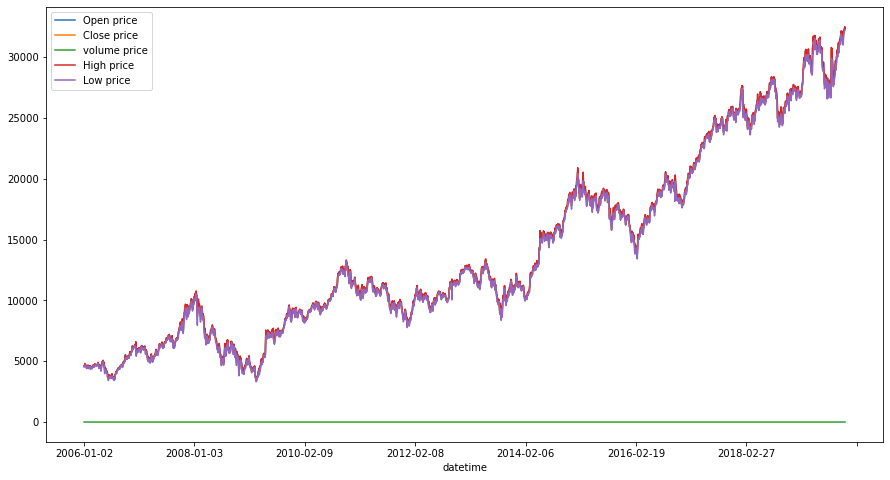

In [20]:
date_ind_df['open'].plot(figsize=(15,8),label='Open price')
date_ind_df['close'].plot(figsize=(15,8),label='Close price')
date_ind_df['volume'].plot(figsize=(15,8),label='volume price')
date_ind_df['high'].plot(figsize=(15,8),label='High price')
date_ind_df['low'].plot(figsize=(15,8),label='Low price',)

plt.legend()

#### From above trend it can be seen that all open, close, high, low prices are increasing 

In [21]:
df.head()

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0


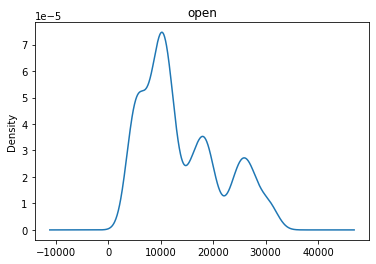

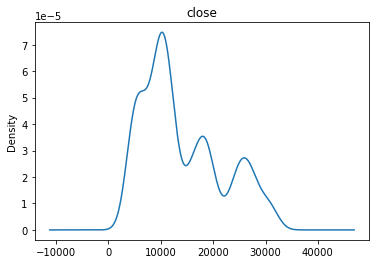

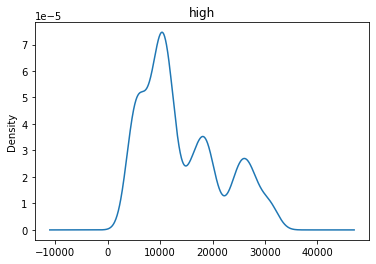

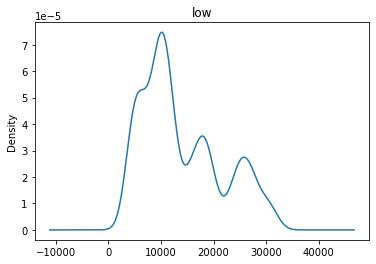

In [22]:
for i in ['open','close','high','low']:
    df[i].plot(kind='kde')
    plt.title(i)
    plt.show()

In [23]:
df.describe()

,open,high,low,close,volume
count,3448.000000,3448.000000,3448.000000,3448.000000,3448.0
mean,14013.821769,14129.682880,13883.132796,14007.342648,0.0
std,7601.245514,7626.954675,7565.885745,7596.458906,0.0
min,3385.400000,3446.750000,3314.550000,3339.700000,0.0
25%,8477.925000,8566.342500,8369.900000,8485.662500,0.0
50%,11379.725000,11460.000000,11262.100000,11362.025000,0.0
75%,18828.805000,18945.425000,18662.655000,18803.425000,0.0
max,32381.000000,32502.800000,32246.050000,32384.950000,0.0


#### There is no much deviation in prices

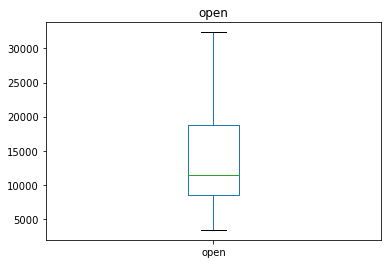

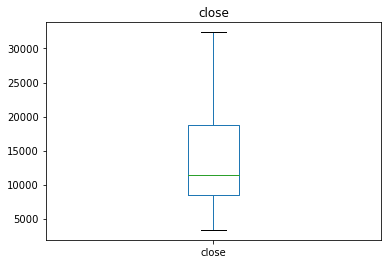

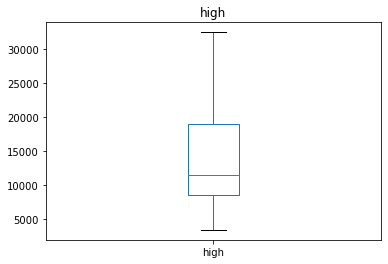

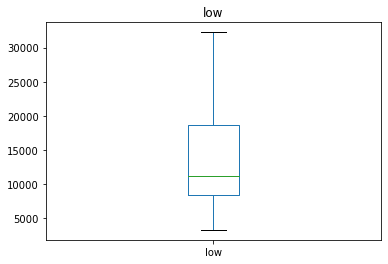

In [24]:
for i in ['open','close','high','low']:
    df[i].plot(kind='box')
    plt.title(i)
    plt.show()

#### There is no outlier prices also

In [25]:
df.head()

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0


<AxesSubplot:xlabel='datetime'>

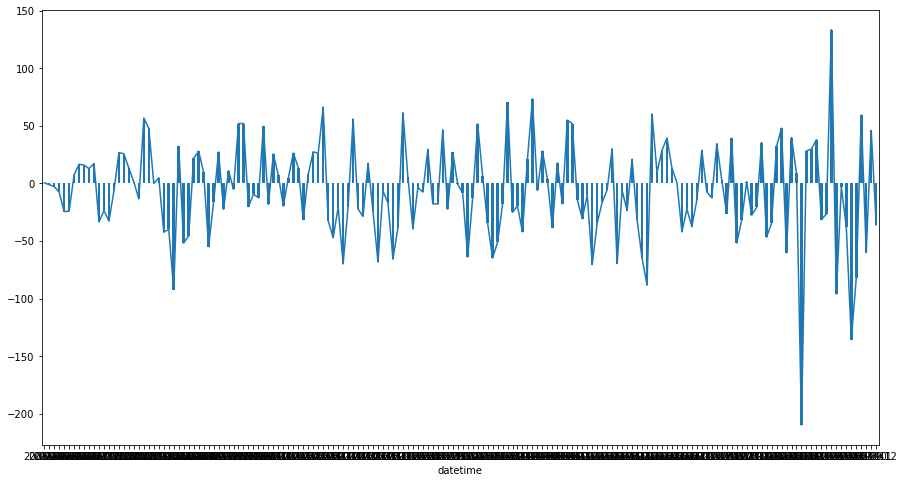

In [39]:
plt.figure(figsize=(15,8))
(df.groupby(df.datetime.str[:7])['close'].mean()-df.groupby(df.datetime.str[:7])['open'].mean()).plot(kind='bar')
(df.groupby(df.datetime.str[:7])['close'].mean()-df.groupby(df.datetime.str[:7])['open'].mean()).plot()
# plt.show()

#### -- In the beginning of 2006 there is less difference between monthly open and close price, but later during 2017 
#### and above, we have huge difference between close and open balance

<AxesSubplot:xlabel='datetime'>

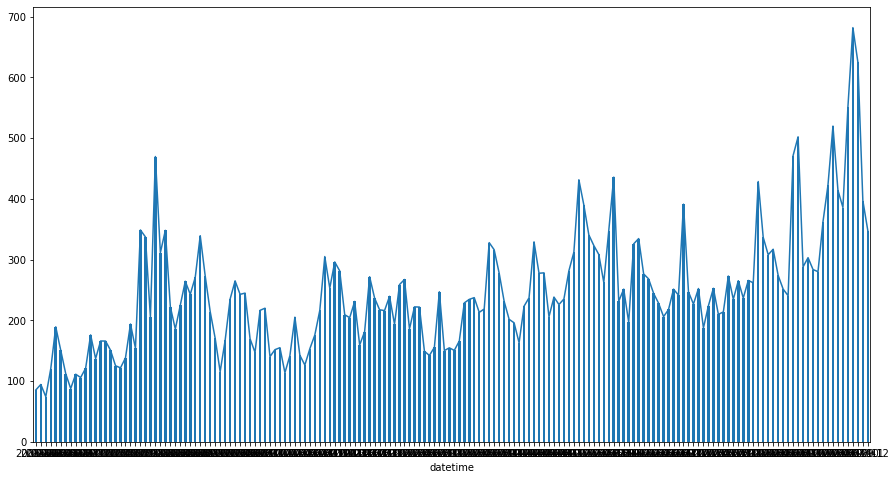

In [40]:
plt.figure(figsize=(15,8))
(df.groupby(df.datetime.str[:7])['high'].mean()-df.groupby(df.datetime.str[:7])['low'].mean()).plot(kind='bar')
(df.groupby(df.datetime.str[:7])['high'].mean()-df.groupby(df.datetime.str[:7])['low'].mean()).plot()
# plt.show()

#### As we can observe that there is gradual increase in diffrence between monthly high and low prices

#### from above graph it can be concluded that 
1) there is constant trend during 2006 to 2009

2) There was sudden increase in 2010 and continued till 2013

3) with gradual increase 2010 to 2015 but prices fallen during 2016.

4) However then after it was increasing from 2017 to 2019

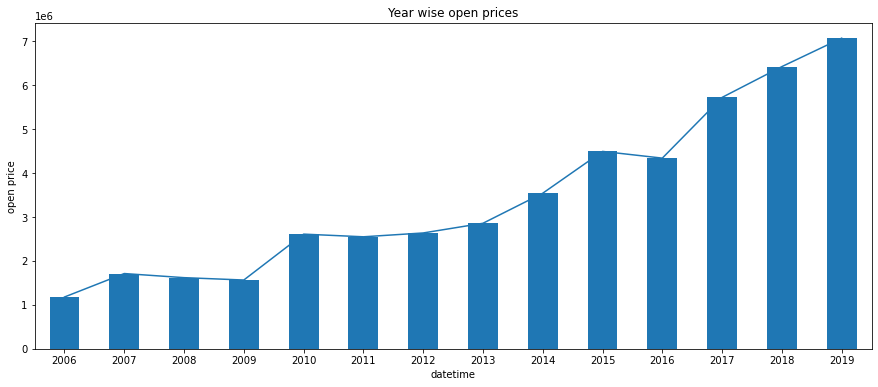

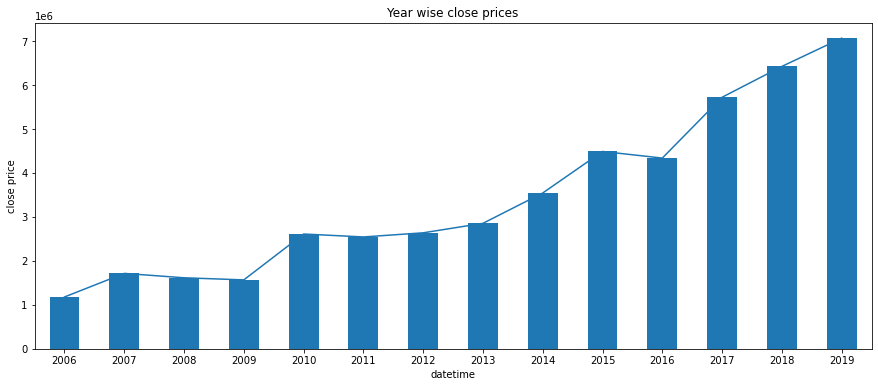

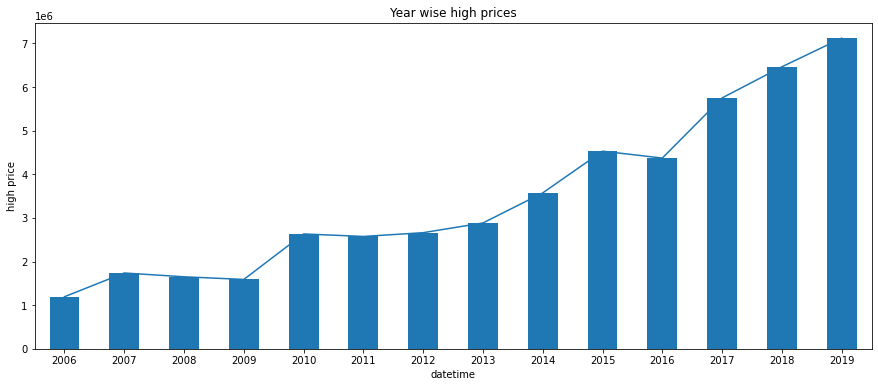

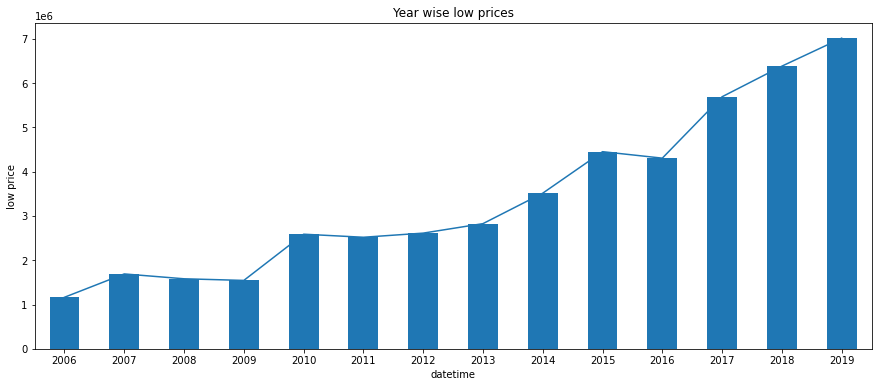

In [61]:
for i in ['open','close','high','low']:
    plt.figure(figsize=(15,6))
    (df.groupby(df.datetime.str[:4])[i].sum()).plot(kind='bar')
    (df.groupby(df.datetime.str[:4])[i].sum()).plot()
    plt.ylabel(i+' price')
    plt.title('Year wise '+ i +' prices' )
    plt.show()

<AxesSubplot:xlabel='Year'>

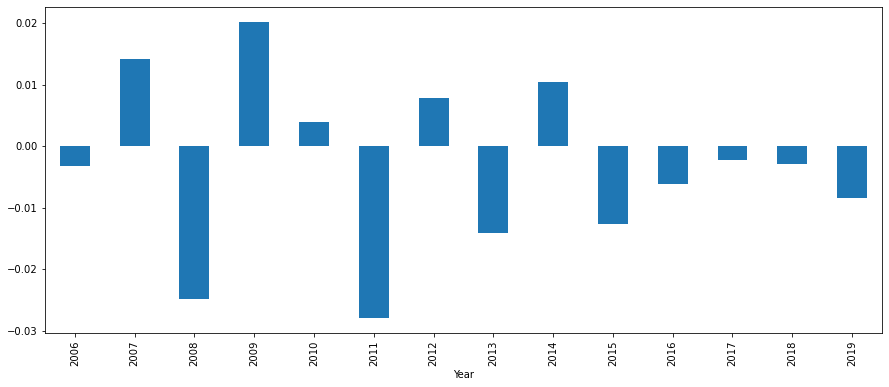

In [62]:
plt.figure(figsize=(15,6))
(grouped_df.groupby(grouped_df.Year)['mon_perc_ret'].sum()).plot(kind='bar')

#### We have profits (+ve monthly returns) only during 2007, 2009, 2010, 2012, 2014

#### and loses(-ve monthly returns) during 2006, 2008, 2011, 2013, 2015, 2016, 2017, 2018, 2019